# Assignment 1

*Author:* Thomas Adler / Eric Volkmann

*Copyright statement:* This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for  personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

## Warmup: Recap on probability theory

### Exercise 1: Bayes' Theorem

Prove Bayes' theorem that says
\begin{equation*}
    p(X \mid Y) = \frac{p(Y \mid X) p(X)}{p(Y)}.
\end{equation*}

########## YOUR SOLUTION HERE ##########
For two events the equation holds:
\begin{equation*}
P(X \cap Y) = P(X)\cdot P(Y \mid X)
\end{equation*}
As the following is also true: 
\begin{equation*}
P(X \cap Y) =  P(Y) \cdot P(X \mid Y)  
\end{equation*}
this leads to: 
\begin{equation*}
P(Y) \cdot P(X \mid Y) = P(X)\cdot P(Y \mid X)
\end{equation*}
if this equation is reformed we get: 
\begin{equation*}
P(X \mid Y) = \frac{P(Y \mid X) \cdot P(X)}{P(Y)}
\end{equation*}

### Exercise 2: Expected Value of the Uniform Distribution

Let $X$ be a random variable drawn from the continuous uniform distribution on the interval $[a, b) \subset \mathbb R$. 

a) Calculate the expected value $\mathbb E[X]$. 

########## YOUR SOLUTION HERE ##########

\begin{equation*}
\mathbb E[X] = \frac{(a +b)} {2}
\end{equation*}

as $[a, b) \subset \mathbb R$ are uniformly disturbed, 

\begin{equation*}
    f(x) = \begin{cases} 
                \frac{1}{b - a} & \text{for } a \leq x < b \\
                0 & \text{else} 
            \end{cases}
\end{equation*}

The expected value is defined as: 

\begin{equation*}
    \mathbb E(X) = \int_{-\infty}^{\infty} x f(x) dx.
\end{equation*}

This integral arround the interval of $[a, b)$ is zero, so the expected value becomes, 

\begin{equation*}
    \mathbb E(X) = \int_{a}^{b} x \frac{1}{b - a} dx 
\end{equation*}

As the part $\frac{1}{b - a}$ is not dependent on x the integral becomes 

\begin{equation*}
    \mathbb E(X) =  \frac{1}{b - a} \int_{a}^{b} x  dx 
\end{equation*}

Solving the integral we get: 

\begin{equation*}
    \int_{a}^{b} x , dx = \left[ \frac{x^2}{2} \right]_{a}^{b} = \frac{b^2}{2} - \frac{a^2}{2}
\end{equation*}

Therefore, E(X) becomes

\begin{equation*}
    \mathbb E(X) =  \frac{1}{b - a} \cdot \frac{b^2}{2} - \frac{a^2}{2}
\end{equation*}

Simplify this is getting to the soution of the expected value of a static uniform distribution on the interval $[a, b)$:

\begin{equation*}
E(X) = \frac{(b - a)(b + a)}{2(b - a)} = \frac{a + b}{2}
\end{equation*}







b) Calculate the Variance $ \operatorname{Var}(X) = \mathbb E \left [ \left( X - \mathbb E [X] \right)^2 \right]$.

What are the interval boundaries of a centered continuous uniform random variable with unit variance?

########## YOUR SOLUTION HERE ##########

### Exercise 3: CLT Simulation

Write a python routine that demonstrates the central limit theorem (CLT). 
Draw $n$ samples $X_1, \dots, X_n$ from the uniform distribution over $[-\sqrt{3},\sqrt{3})$. 
Then compute $Z = \frac{1}{\sqrt{n}} \sum_{i=1}^n X_i$. 
Compute 100000 realizations of $Z$ and summarize them in a density or histogram plot. 
Compare the resulting curves to the density of the standard normal distribution. 
Perform this procedure for $n \in \{1, 2, 10\}$. 
What do you observe and how do your observations relate to the CLT?

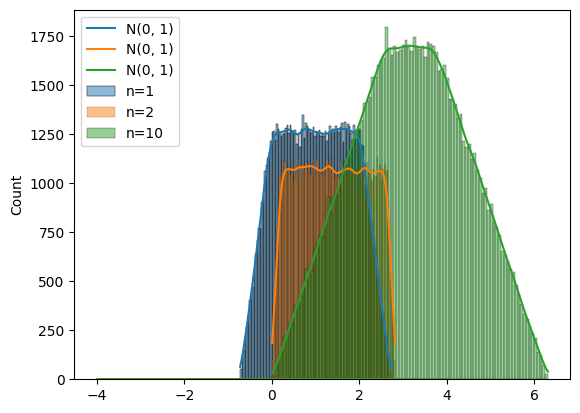

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

########## YOUR SOLUTION HERE ##########

def CLT(n):
    sample_means = []
    for i in range(100000):
        samples = np.random.uniform((-np.sqrt(3), np.sqrt(3)), n)
        z = 1 / np.sqrt(n) * (sum(samples))
        sample_means.append(z)
    return sample_means

n = {1, 2, 10}

for i in n:
    sample_means = CLT(i)
    sns.histplot(sample_means, bins=100, kde=True, label=f'n={i}')
    plt.plot(np.linspace(-4, 4, 1000), scipy.stats.norm.pdf(np.linspace(-4, 4, 1000), 0, 1), label='N(0, 1)')
plt.legend()
plt.show()



## Statistical Learning Theory

### Exercise 4: Chernoff Bound for Gaussians with Equal Covariance

Read up on section 5.1 "error bounds for a Gaussian classification task" in the old lecture notes. 
Derive the Chernoff bound under the assumption that both classes have equal covariance, i.e., $\Sigma_1 = \Sigma_2$. 

########## YOUR SOLUTION HERE ##########

In sechtin 5.1 it reads: The Chernoff bound is obtained by maximizing v(β) with respect to β and substituting this β into eq. (5.4). \\

\begin{equation}
v(\beta) =  \frac{\beta(1-\beta)}{2}(\mu_2  - \mu_1)^T(\beta \Sigma_1 + (1-\beta)\Sigma_2)^{-1} (\mu_2 - \mu_1) + \frac{1}{2} ln(\frac{\mid \beta \Sigma_1 + (1 - \beta)\Sigma_2 \mid}{\mid \Sigma_1 \mid ^{\beta} \mid \Sigma_2 \mid ^{1-\beta}})
\end{equation}

With the assumtion that $\Sigma_1 = \Sigma_2$ the term of $v(\beta)$ can be simplified therefore we look at the parts of the Term that contain $\Sigma$:
1: 
\begin{equation}
(\beta \Sigma_1 + (1-\beta)\Sigma_2)^{-1} 
\end{equation}
with $\Sigma_1 = \Sigma_2$ it becomes 
\begin{equation}
\Sigma^{-1} 
\end{equation}
2:
\begin{equation}
 \frac{1}{2} ln(\frac{\mid \beta \Sigma_1 + (1 - \beta)\Sigma_2 \mid}{\mid \Sigma_1 \mid ^{\beta} \mid \Sigma_2 \mid ^{1-\beta}}) 
\end{equation}
with $\Sigma_1 = \Sigma_2$ it becomes 
\begin{equation}
 \frac{1}{2} ln(\frac{\mid \beta \Sigma + (1 - \beta)\Sigma \mid}{\mid \Sigma \mid ^{\beta} \mid \Sigma \mid ^{1-\beta}}) = 
 \frac{1}{2} ln(\frac{\mid  \Sigma \mid}{\mid \Sigma \mid ^{1-\beta+\beta}}) = 
 \frac{1}{2} ln(1) = 0
\end{equation}
With this $v(\beta)$ becomes:
\begin{equation}
v_{\beta} = \frac{\beta(1-\beta)}{2}(\mu_2  - \mu_1)^T \Sigma^{-1}  (\mu_2 - \mu_1)
\end{equation}

Maximise $\beta$: $ max(\beta(1-\beta))= \frac{1}{2}§

Plug in $\frac{1}{2}$ into $v_{\beta}$:
\begin{equation}
v_{\beta} = \frac{\frac{1}{2}(1-\frac{1}{2})}{2}(\mu_2  - \mu_1)^T \Sigma^{-1}  (\mu_2 - \mu_1) = \frac{1}{8}(\mu_2  - \mu_1)^T \Sigma^{-1}  (\mu_2 - \mu_1)
\end{equation} 
Plug this into eq(5.4):
\begin{equation}
exp( - \frac{1}{8}(\mu_2  - \mu_1)^T \Sigma^{-1}  (\mu_2 - \mu_1))
\end{equation} 
That is the Bhattacharyya Bound, a special case of the Chernoff bound. 

### Exercise 5: Proof of Markov's Inequality

Markov's inequality states that for any non-negative random variable $X$ with finite expectation, 
\begin{align*}
    \mathbb P(X \geq a) \leq \frac{\mathbb E[X]}{a}
\end{align*}
holds for all $a > 0$. Prove this result. 

########## YOUR SOLUTION HERE ##########
\begin{equation}
\mathbb E(X) = \sum_x x P(X=x) \geq \sum_{x \geq a} x P(X = x)  \geq a \sum_{x \geq a} P(X=x) = a P(X \geq a)
\end{equation}
=> $ \mathbb E(X) \geq a P(X \geq a)$ for all $ a > 0$ 

### Exercise 6: Generalization Bound for a Finite Model Class

#### Reminder: 
Hoeffding's lemma states that
\begin{align*}
    \mathbb E[e^{s(X-\mathbb E[X])}] \leq e^{s^2 (b-a)^2 / 8} \quad \forall s \in \mathbb R,
\end{align*}
where $X$ is a random variable bounded by $a \leq X \leq b$. 

Hoeffding's inequality states the following:

Let $X_1, \dots, X_n$ be $n$ independent random variables bounded by $a \leq X_i \leq b$ for all $i \in \{1, \dots, n\}$ and let $Z = \sum_{i=1}^n X_i$. 
Then
\begin{align*}
    \mathbb P(Z - \mathbb E[Z] \geq t) \leq \exp\left(-\frac{2t^2}{n(b-a)^2}\right)
\end{align*}
holds for all $s,t > 0$. 

#### Exercise:

Let $R(g)$ denote the risk and $\hat R(g)$ the empirical risk over a training set of $n$ samples for a model $g \in \mathcal G$, where the model class $\mathcal G$ consists of $m < \infty$ models. 
Both $R$ and $\hat R$ are based on the zero-one loss, i.e., $R(g) = \mathbb E[\ell(Y, g(X))]$ and $\hat R = \frac1n \sum_{i=1}^n \ell(y_i, g(x_i))$, where $\ell: \mathcal Y \times \mathcal Y \to \{0,1\}$ is the zero-one loss function. 
Further, let $\hat g = \arg \min_{g \in \mathcal G} \hat R(g)$ be the model that minimizes the empirical risk and $g^\ast = \arg \min_{g \in \mathcal G} R(g)$ the model that minimizes the risk. 

Prove the following bound on the estimation error $R(\hat g) - R(g^\ast)$ (i.e., the excess of the risk due to empirical risk minimization) using Hoeffding's inequality:
\begin{align*}
    \mathbb{P}(R(\hat g) - R(g^\ast) \geq t) \leq 2 m \exp(-\frac{nt^2}{2}).
\end{align*}
Interpret this result!

*Hint 1*: Prove and use the fact that $R(\hat g) - R(g^\ast) \leq 2 \max_{g \in \mathcal G} |\hat R(g) - R(g)|$.

*Hint 2*: Compute Hoeffdings inequality for the expression $\mathbb P(|Z - \mathbb E[Z]| \geq t)$ and try to use this new inequality.

########## YOUR SOLUTION HERE ##########

### Exercise 7: Generalization Bound for Floating Point Models

The bound from the previous exercise applies only to finite model classes. 
When we optimize a model over real parameters on a computer, the model class (although theoretically infinite) is practically restricted by the representation of parameters as floating-point numbers. 
Modify the bound from the previous exercise to a model class with $k$ parameters represented by $b$ bits floating-point numbers. 
For a risk excess of $t = 0.01$ and a risk excess probability of not more than $\delta = 0.01$ and using 32-bit parameters, what is the required training set size $n$ as a function of the number of parameters $k$? 
Discuss your results! 

########## YOUR SOLUTION HERE ##########

### Exercise 8: VC Dimension of Linear Classifiers

The VC dimension is defined as 
\begin{align*}
    \operatorname{VC}(\mathcal G) = \max_{n \in \mathbb N} \{n \mid \sup_{x_1, \dots, x_n} N_{\mathcal G}(x_1, \dots, x_n) = 2^n\},
\end{align*}
where $N_{\mathcal G}$ is the shattering coefficient, i.e., the number of different binary labellings the model class $\mathcal G$ can produce for the set $\{x_1, \dots, x_n\}$. 
Intuitively, the VC dimension is the maximum number of points for which there exists a configuration so that $\mathcal G$ can produce all possible labellings. 

Consider the model class 
\begin{align*}
    \mathcal G = \{g : g(x) = \operatorname{sign}(w^\top x), w\in \mathbb R^d\}.
\end{align*}

a) Lower bound:  Prove that $\operatorname{VC}(\mathcal G) \geq d$. 

########## YOUR SOLUTION HERE ##########

b) Upper bound: Prove that $\operatorname{VC}(\mathcal G) < d+1$ and conclude that $\operatorname{VC}(\mathcal G) = d$. 


*Hint:* You can do a proof by contradiction. 
To this end, assume that $\operatorname{VC}(\mathcal G) = d+1$. 
This implies that there exist $2^{d+1}$ models $w$ generating all possible labellings. 
Assume we assemble these models into one matrix $W \in \mathbb R^{d \times 2^{d+1}}$ whose columns contain the $2^{d+1}$ parameter vectors. 
Then the matrix $X^\top W \in \mathbb{R}^{(d+1) \times 2^{d+1}}$ must contain all possible labellings in its columns, where $X = (x_1, \dots, x_{d+1}) \in \mathbb R^{d \times d+1}$. 
Explain why such a matrix cannot exist. 

########## YOUR SOLUTION HERE ##########